# TERM DEPOSIT MARKETING

## CONTEXT

The client is an early stage startup that focuses on providing Machine Learning solutions like Fraud Detection, Sentiment Analysis and Customer Intention Prediction and Classification, primarily for the EU banking market. They want to build a robust ML solution that leverages incoming call center data and uses to predict whether a customer will subsrcribe to a term deposit. 

## DATA DESCRIPTION

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

### ATTRIBUTES

- **age** : age of customer (numeric)
- **job** : type of job (categorical)
- **marital** : marital status (categorical)
- **education** level of customer's education (categorical)
- **default**: has credit in default? (binary)
- **balance**: average yearly balance, in euros (numeric)
- **housing**: has a housing loan? (binary)
- **loan**: has personal loan? (binary)
- **contact**: contact communication type (categorical)
- **day**: last contact day of the month (numeric)
- **month**: last contact month of year (categorical)
- **duration**: last contact duration, in seconds (numeric)
- **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

**Output (desired target)**:

- **y** - has the client subscribed to a term deposit? (binary)

## PROJECT GOALS
- To build a Machine Learning model that predicts if the customer will subscribe (yes/no) to a term deposit (variable y).
- Achieve an accuracy of **>= 81%** by evaluating with 5-fold cross validation and reporting the average performance score.
- Determine the segment(s) of customers that the client should prioritize i.e. who are more likely to buy the investment product.
- Find out the features that contribute the most towards guaging what the customers buy and the client should be focusing more on.

## METHODLOGY

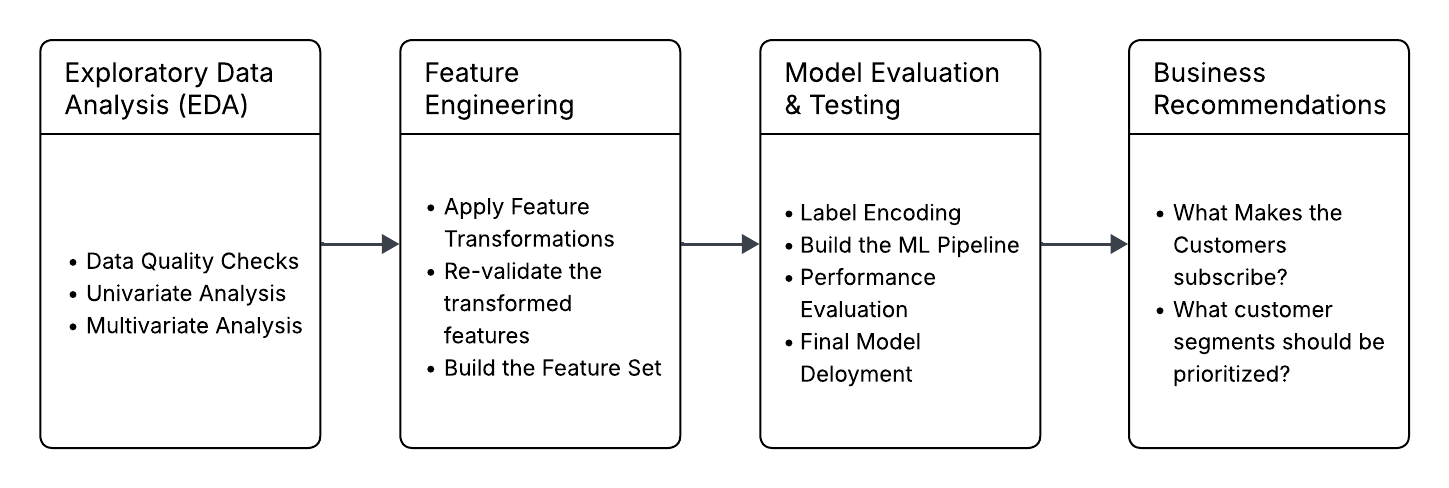


In [1]:
# import data analysis libraries  
import numpy as np
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

print("installed all dependencies...")

installed all dependencies...


## EXPLORATORY DATA ANLAYSIS 

### DATA QUALITY CHECKS

In [2]:
#Load the Dataset and view the first few records
data = pd.read_csv('term-deposit-marketing-2020.csv')
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [3]:
data.shape # view the dimensions - rows X columns

(40000, 14)

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [5]:
data.isna().sum() # check for NULL values in each column/field

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64

In [8]:
columns = data.columns.tolist()
continuous_attrs = data._get_numeric_data().columns.tolist()
continuous_attrs

['age', 'balance', 'day', 'duration', 'campaign']

In [9]:
data[continuous_attrs].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.54,9.64,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.28,2903.77,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.02,8.28,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.82,259.37,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.88,3.24,1.0,1.0,2.0,3.0,63.0


In [10]:
discrete_attrs = list(set(columns) - set(continuous_attrs) - set(['y']))
discrete_attrs.sort()
discrete_attrs

['contact',
 'default',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month']

In [11]:
for i in discrete_attrs:
   
    print(data[i].value_counts())
    print("----------------------------------------")

contact
cellular     24914
unknown      12765
telephone     2321
Name: count, dtype: int64
----------------------------------------
default
no     39191
yes      809
Name: count, dtype: int64
----------------------------------------
education
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: count, dtype: int64
----------------------------------------
housing
yes    24031
no     15969
Name: count, dtype: int64
----------------------------------------
job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: count, dtype: int64
----------------------------------------
loan
no     33070
yes     6930
Name: count, dtype: int64
----------------------------------------
marital
married     24386
single      10889
divorced     4725
Name: count, dtype

In [12]:
data[['y']].value_counts()

y  
no     37104
yes     2896
Name: count, dtype: int64

#### OBSERVATIONS

- The dataset has a dimension of 40000 rows X 14 columns.
- None of the columns/attributes have any NULL values - so no NULL imputation required.
- There are no duplicate records in the dataset i.e. no initial noise.
- 8 attributes are discrete/categorical features whereas 5 attributes are continuous/quantiative features. So, its good to analyze them separarely.
- 'balance' is the only continuous feature that has negative values, the rest are >= 0.
- 'default' and 'loan' discrete features exhibit a very imbalance in terms of the data values in them.
- The target 'y' itself very heavily imbalanced. Approx. 37K records are 'no' and only 2896 are 'yes'. Hence, oversampling will be needed later on.

To get a better idea of the frequency distribution and statistical measures, each individual features and the relationships between different features needs to examined. 

### UNIVARIATE ANLAYSIS 
- For the continuous features - detect the outliers and test for normal distribution.
- For the discrete features - find out the frequency distribution of each feature.

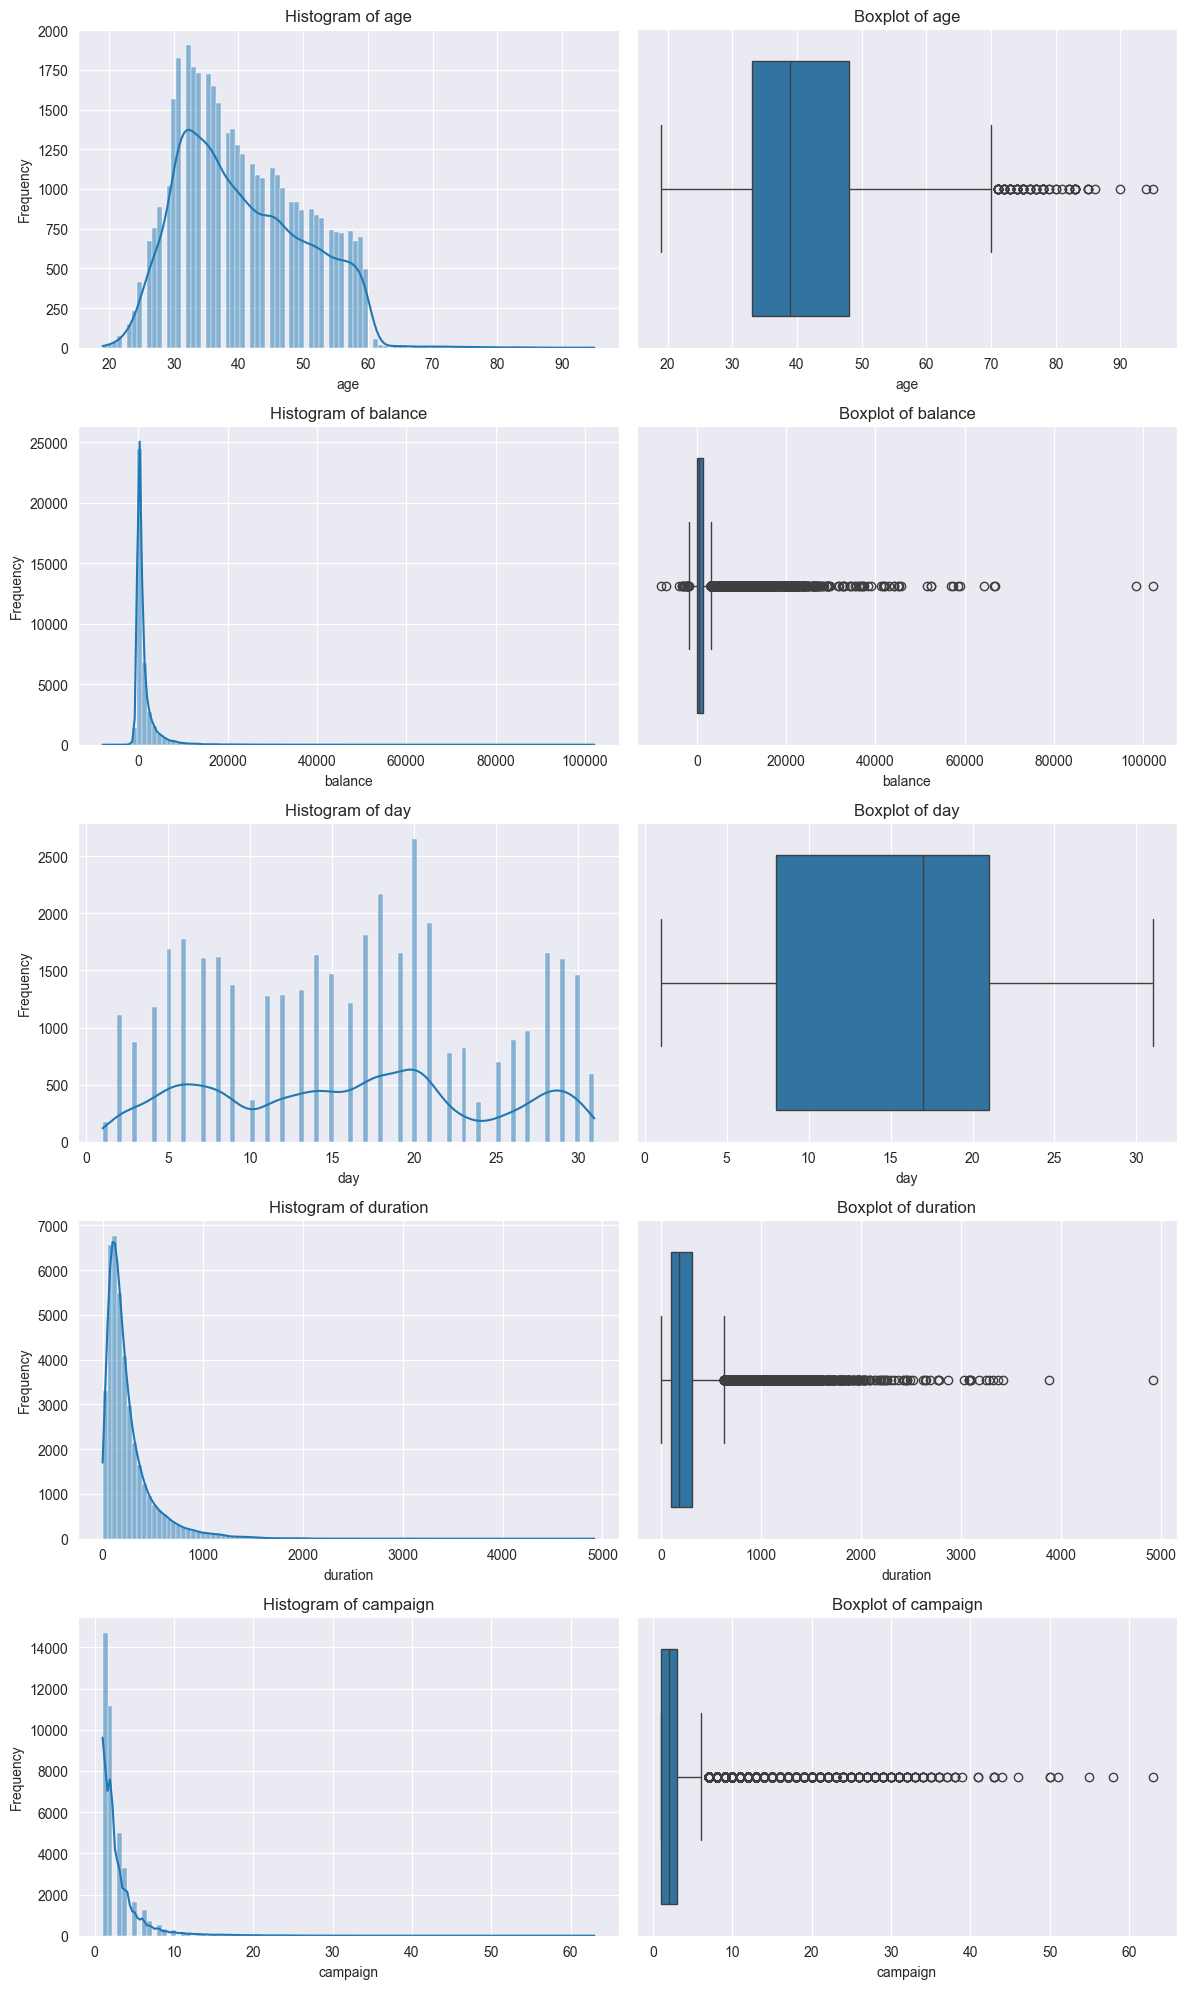

In [13]:
"""
    plot_hist_box() : function to generate the histogram and box plot for the given feature(s)
    @params : data - the pandas dataframe comprising the dataset, continuous_cols[] - an array holding the continuous features column names
    @return: None
"""
def plot_hist_box(data, continuous_cols):

    n = len(continuous_cols)
    plt.figure(figsize=(12, 4 * n))

    for i, col in enumerate(continuous_cols):
        # Histogram
        plt.subplot(n, 2, 2*i + 1)
        sns.histplot(data[col], bins=100, kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        # Boxplot
        plt.subplot(n, 2, 2*i + 2)
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

plot_hist_box(data, continuous_attrs)

#### OBSERVATIONS

- Except for the "day", all continuous features contain a very number of outliers.
- 'balance', 'duration' and 'campaign' have a similar pattern - all three are rightly skewed distribution and have about similar proportion of outliers.
- Only 'age' has a somehwat near normal distrubition and is free of outliers - and given its fixed range of values - its pretty much a discrete feature.

Based on the these observations, the initial intuition points towards the following treatments:

- Discretize the age to avoid any statistical biases that might come due to its numerical nature.
- Either performing percentile capping or do a log transformation on balance, campaign and duration.
- Also, discretize the day feature into time slot like categories to prevent any syatistical biases coming from its numerical nature as well.

To get a more in-depth idea of how the behavorial patterns of these continuous features w.r.t to the other discrete features and the target variable, further multivariate analysis is needed.  

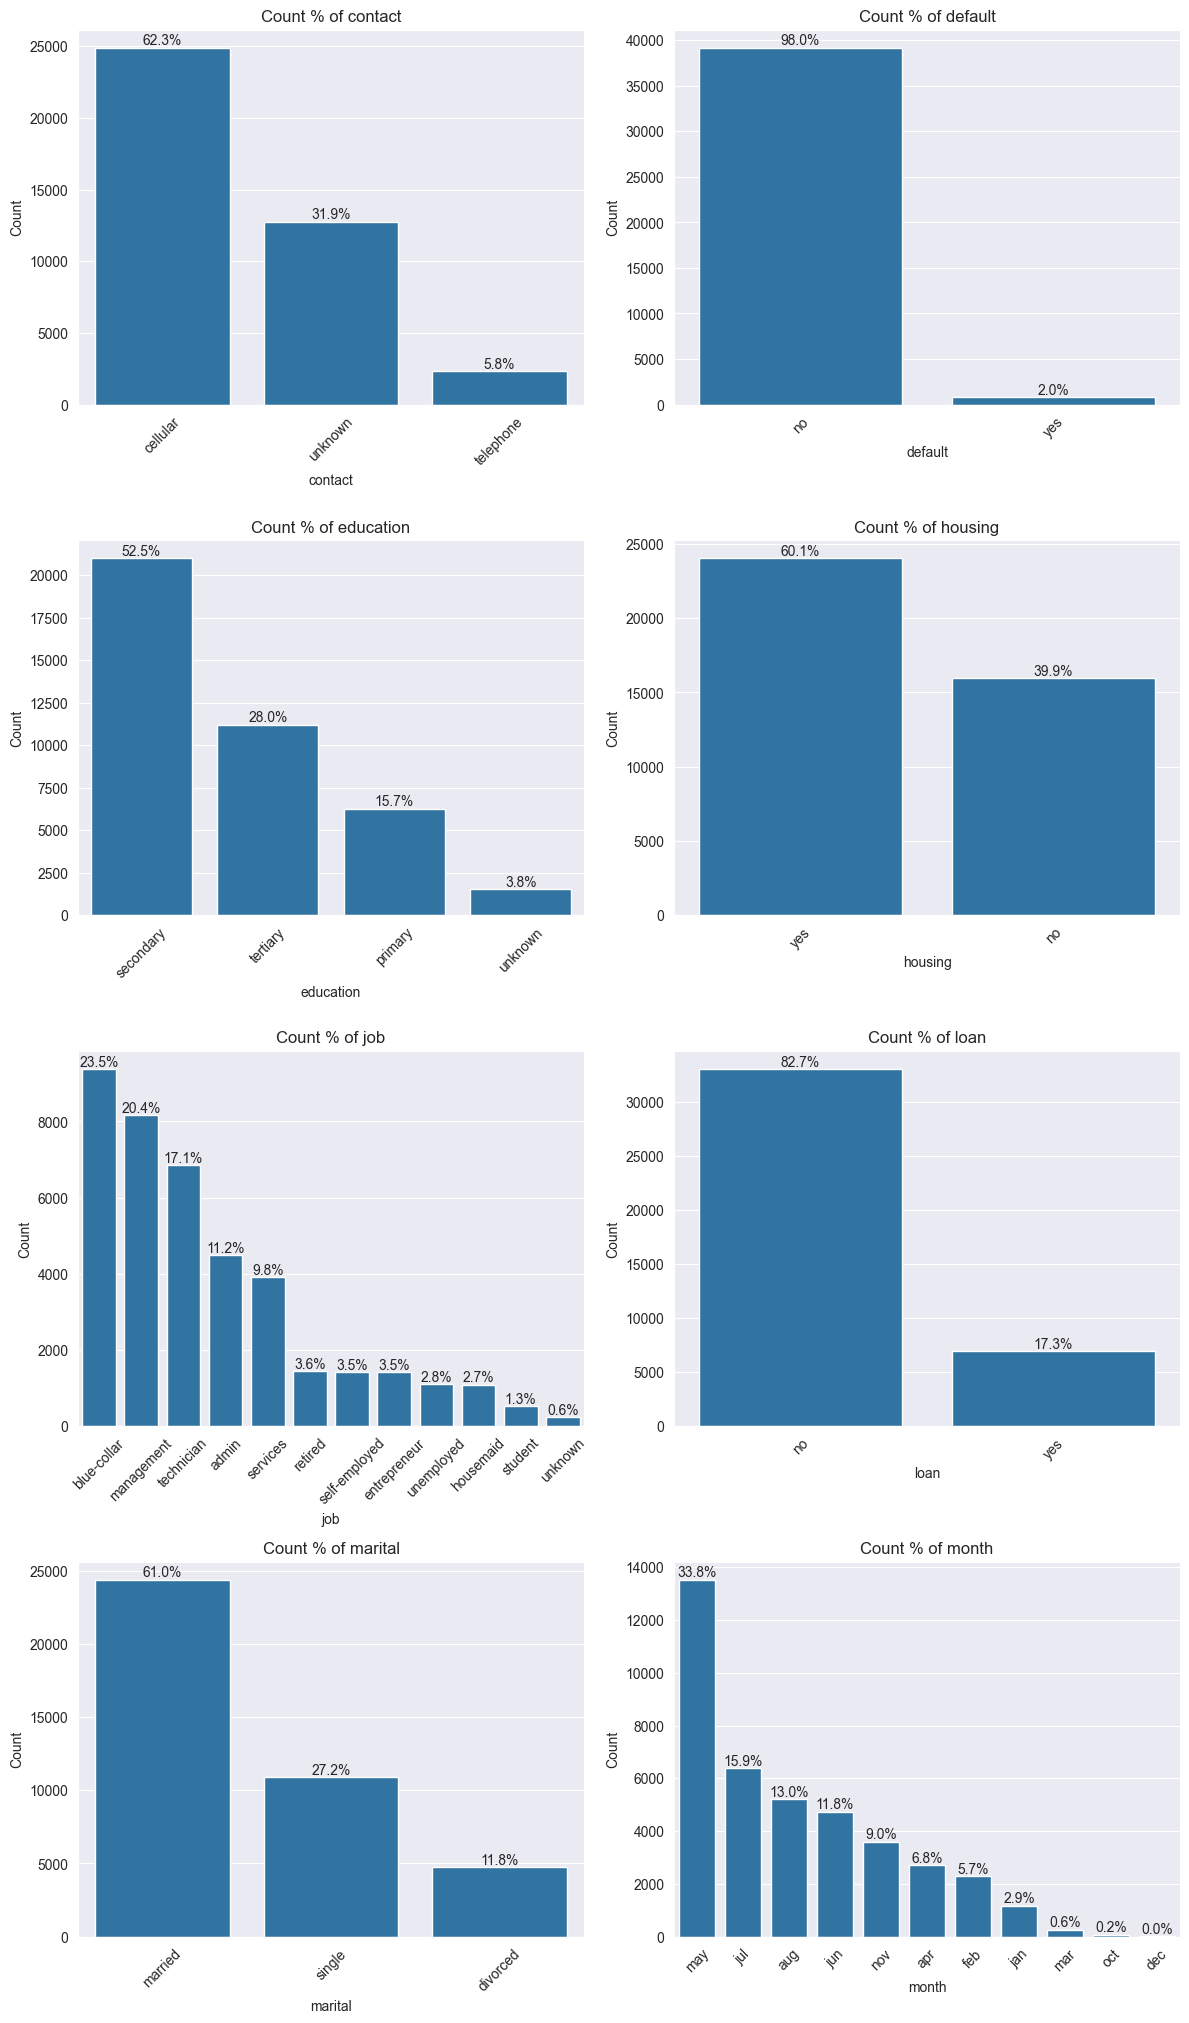

In [14]:
def plot_categorical_counts(data, categorical_cols):
    n = len(categorical_cols)
    plt.figure(figsize=(12, 5 * n))

    for i, col in enumerate(categorical_cols):
        plt.subplot(n, 2, i + 1)
        order = data[col].value_counts().index
        ax = sns.countplot(data=data, x=col, order=order)
        
        total = len(data)
        for p in ax.patches:
            count = p.get_height()
            percent = f'{100 * count / total:.1f}%'
            ax.annotate(percent, 
                        (p.get_x() + p.get_width() / 2., count), 
                        ha='center', va='bottom', fontsize=10)

        plt.title(f'Count % of {col}')
        plt.xticks(rotation=45)
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_categorical_counts(data, discrete_attrs)

#### OBSERVATIONS

- Delving deeper at a more granular level, a lot of imbalance in the data values can be noticed in most of the discrete features.
- 'default' is almost entirely 'no', and its a good candidate to be removed from the feature selection - but after further inspection is needed.
- 'housing' seems to be most well-balanced discrete feature here in a decent 60-40 split between those who have taken a house loan and those who haven't, respectively.
- the marital status also seems be to decently balanced - 61% are married whereas the rest 40% are either single or divorced, so a somewhat 60-40 split here as well.
- For education about 50% are secondary, whereas the rest 50% are primary, tertiary and unknown - so its the closest to a 50-50 split we can get.
- The job has a lot of categorical data values and some of them can be put together in one group, to reduce the number of categories for better generalization.
- A similar treatment could also be applied to the month and it can be better generalized by grouping them into quarters.

The initial intuition calls for generalizing the discerete with a lot of categories or grouping them in a way that its reduces the frequency imbalance. A more in-depth would be provided when we analyze its relationship with the target and other continuous features. 

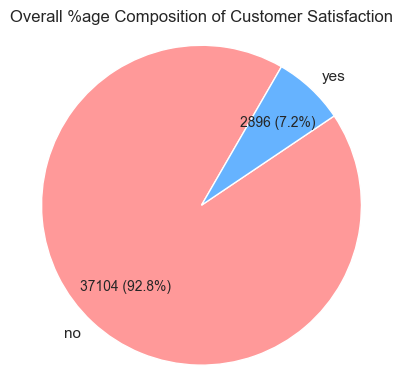

In [15]:
# create a dataframe having the counts of 0's and 1's in the target class and compute their percentage out of total observations
counts_df = data['y'].value_counts().to_frame(name='Count').reset_index()
counts_df['Percentage'] = round((counts_df['Count']/data.shape[0]) * 100.0,2)
counts_df = counts_df.sort_values('y')

# create the labels and sizes for the pie chart
labels = counts_df['y'].astype(str).tolist()
sizes = counts_df['Count'].tolist()
percentages = counts_df['Percentage'].tolist()

# Manually format label as "count (percentage)"
autopct_labels = [f"{c} ({p:.1f}%)" for c, p in zip(sizes, percentages)]

# Pie chart
plt.figure(figsize=(4, 4))
wedges, texts = plt.pie(
    sizes,
    labels=labels,
    startangle=60,
    colors=['#ff9999', '#66b3ff'],
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 11}
)

# Add manually formatted labels
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.7 * np.cos(np.deg2rad(angle))
    y = 0.7 * np.sin(np.deg2rad(angle))
    plt.text(x, y, autopct_labels[i], ha='center', va='center', fontsize=10)

plt.title("Overall %age Composition of Customer Satisfaction")
plt.axis('equal')
plt.tight_layout()
plt.show()

#### OBSERVATIONS

- The target variable is overwhelmingly imbalanced - only 7% osberved customers have subsrcibed to the investment product.
- Oversampling of the target, to include as many instances as possible of 'yes' is going to be an imperative step in the model training. 

### MULTIVARIATE ANLAYSIS 

- Use pearson correlation to find the relationship among the continuous features
- Use chi-square test to find the correlation of the discrete features to the target 'y'
- Determine the spread of data values in the target using pair plot to find relationship between continuous and the discrete target 'y' 
- Find out the mutual information for all features and determine how information does a feature contribute towards the target 'y'

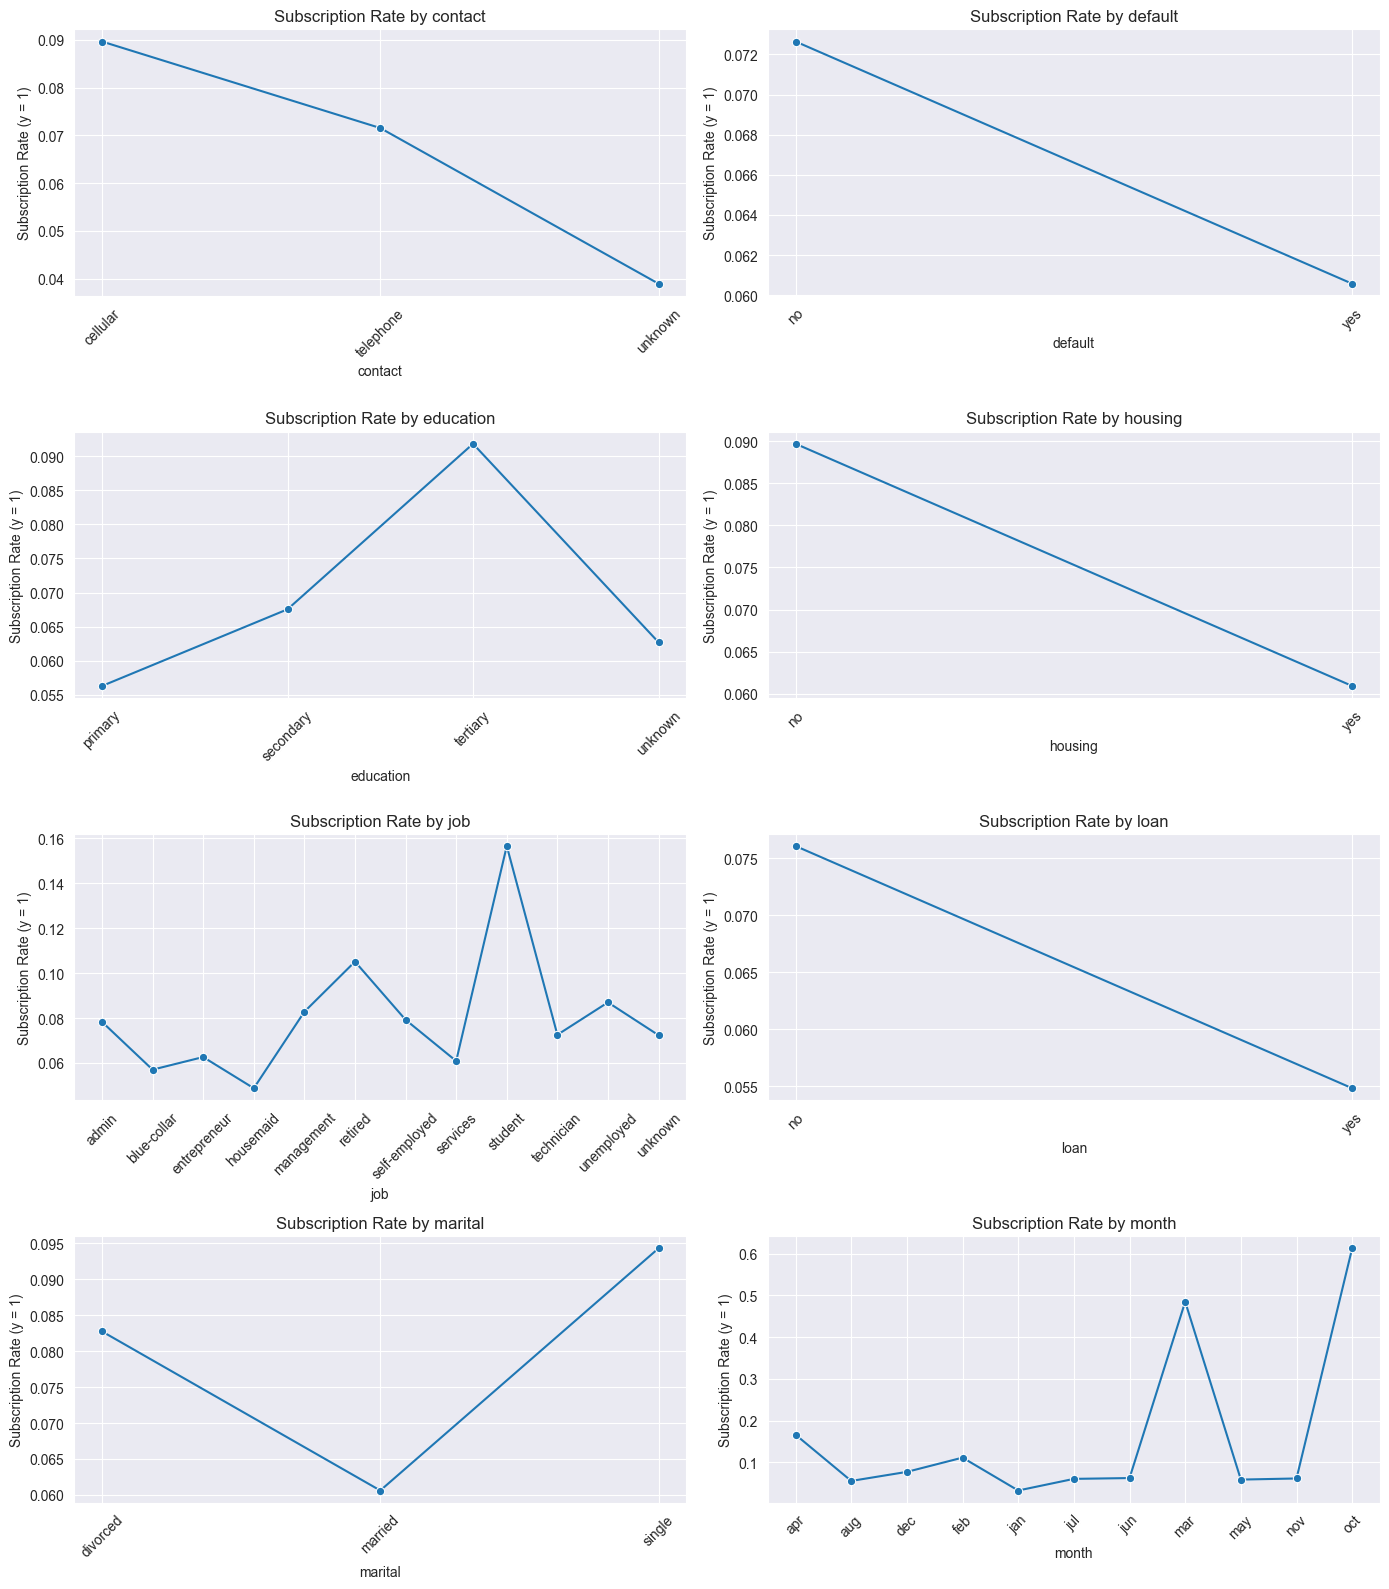

In [16]:
"""
    plot_subscription_rates_for_discrete_features() : function to generate line plot showing %age of y=1 for each discete feature
    @params : data - the pandas dataframe comprising the dataset, features - an array holding the discrete cols, target - set to column 'y'
    @return: None
"""

def plot_subscription_rates_for_discrete_features(data, features, target='y'):
    num_features = len(features)
    ncols = 2
    nrows = (num_features + 1) // 2

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        # Group and compute subscription rate
        counts = data.groupby(feature)[target].value_counts().unstack(fill_value=0)
        counts['subscription_rate'] = counts['yes'] / (counts['yes'] + counts['no'])

        # Sort for clean visualization
        #counts = counts.sort_values(by='subscription_rate', ascending=False)

        # Plot
        sns.lineplot(data=counts, x=counts.index, y='subscription_rate', marker='o', ax=axes[i])
        axes[i].set_title(f'Subscription Rate by {feature}')
        axes[i].set_ylabel('Subscription Rate (y = 1)')
        axes[i].set_xlabel(feature)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True)

    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    
plot_subscription_rates_for_discrete_features(data, discrete_attrs, target='y')

#### OBSERVATIONS

- The subscription conversion rates are highly biased for customers who do not have a credit in default, or taken any personal or home loans. 
- The months of March and October witness a spike in subscription rates, whereas it remains lower throughout the rest of the year.
- For the job category -> students, retired person and those who are unemployed tend to have to higher conversation rates than others. 
- Customers that are single and have attained tertiary education levels are also highly likely subscribers. 
- Lastly, a customer who communicates to the client via cellular means has much higher likelihood of converting to a subscriber than other means.

So, just based on the discerete features we can create the following logical inference. 

A likely subscriber is: <br>
-> has no home or personal loan <br>
-> is not a defaulter <br>
-> communicates to the client in either march or october and via cellular means <br>
-> is most probably a student, but could also be retired personnel or who is not employed right now <br>
-> Is single, has completed tertiary level of eduation <br>

In [17]:
from scipy.stats import chi2_contingency

'''
chi_square_test_categorical_vs_target() - function to perform the chi-square test between each categorical feature and the binary target 'y'
@params : data - the input pandas dataframe, discrete_cols[] - array containing the discrete feature column names, target - set to 'y'
@return : res - output dataframe containing the p-value and statistical signficance for each discrete feature
'''
def chi_square_test_categorical_vs_target(data, discrete_cols, target='y'):

    df = data.copy()
    df[target] = df[target].map({'yes': 1, 'no': 0})

    arr = []

    for col in discrete_cols:
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p, dof, _ = chi2_contingency(contingency_table)
        arr.append({
            'feature': col,
            'chi2_stat': chi2,
            'p_value': p
        })

    res = pd.DataFrame(arr).sort_values(by='p_value')
    res['significant_at_0.05'] = res['p_value'] < 0.05
    return res
    
chi_results = chi_square_test_categorical_vs_target(data, discrete_attrs, target='y')
chi_results['p_value'] = round(chi_results['p_value'],5)
chi_results

,feature,chi2_stat,p_value,significant_at_0.05
7,month,1523.706662,0.00000,True
0,contact,323.007275,0.00000,True
6,marital,135.898096,0.00000,True
3,housing,117.669421,0.00000,True
4,job,149.750422,0.00000,True
2,education,96.674415,0.00000,True
5,loan,38.196872,0.00000,True
1,default,1.545943,0.21374,False


#### OBSERVATIONS

- Except for the 'default' feature, all other discrete features have a p-value <= 0.05 and hence, are statistically signficant.
- So, whether the customer has a credit in default or not, is not a predictive factor - conventionally it should have been, but for this dataset, it is not.
- Month has the highest chi_square stat score, way more than others, implying that seasonality is a strong indicator of subscription.
- Earlier it was decided to group the month into quarters, but due to such high predictive strength, this treatment maybe rolled back, and continue with the feature as it is.
- All other discrete features are also fairly indicative of subscription behavior. They will further be analyzed in more detail.

<Axes: >

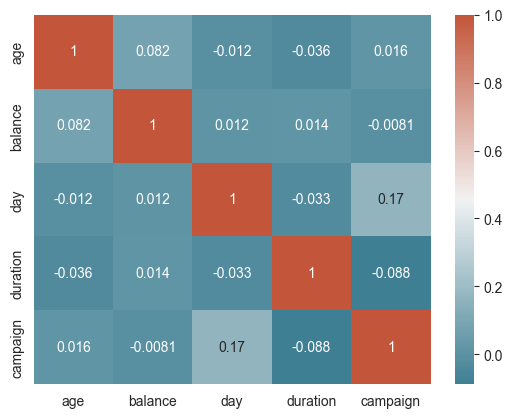

In [18]:
corr = data[continuous_attrs].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### OBSERVATIONS

- Age and Duration are negatively correlated - implying that younger customers speak to the client for a lesser call duration that older customers.
- Older customers tend to have to greater avg. yearly balance (Euros) compared to younger customers - implying greater financial stability with age.
- Balance and Campaign also have a positive correlation - implying more no. of contacts were performed for customers with greater avg. yearly balance, and subsequently who were older, hence financially more stable. 

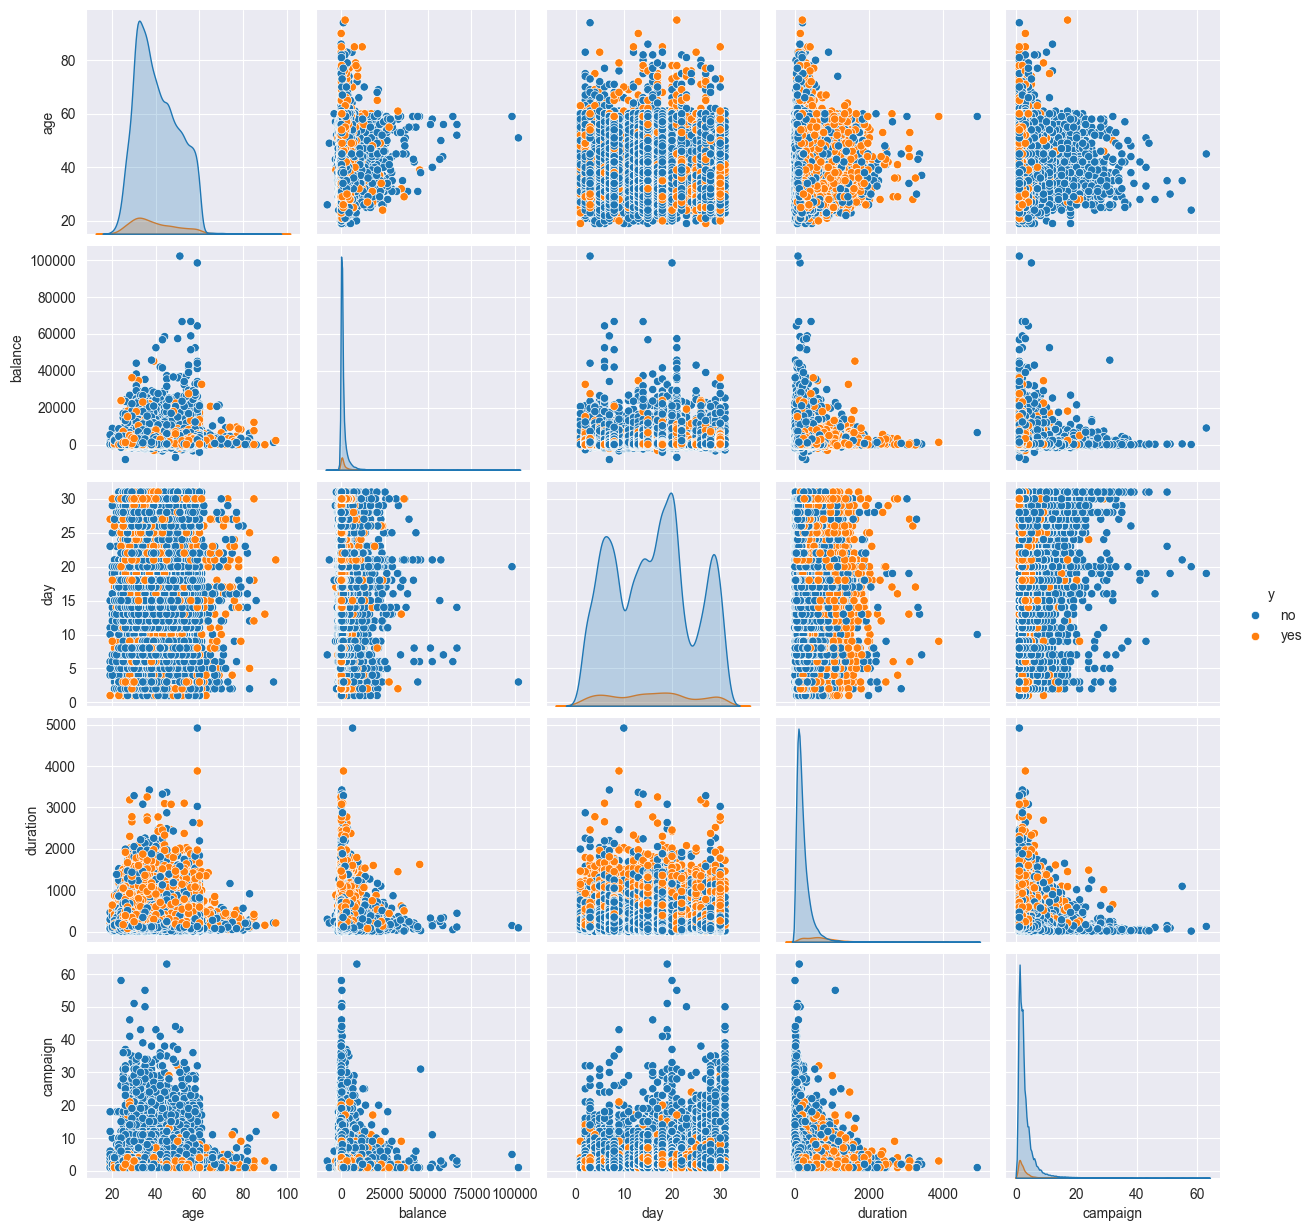

In [19]:
# Pair plot for selected numeric features
sns.pairplot(data[continuous_attrs + ['y']], hue='y')
plt.show()

#### OBSERVATIONS

- Duration is a strong predictive indicator. Clients who subscribed generally had higher call durations.Few short calls result in subscriptions, whereas longer calls often do.
- Balance is weakly correlated to the target. Subscriptions are spread across a wide range of balances, including negative balances (which we noticed in EDA). So, balance alone isn't a reliable predictor for targeting.
- No marked trend for day and campaign. These features may hold limited predictive power on their own - maybe would work better when tagged along other features.
- Subscribed clients seem to cluster a bit more around mid-30s to late 50s, while unsubscribed ones span the entire range. This might imply towards building age-related targeting strategies later on.

So, just based on the continous features we can create the following logical inference. 

A likely subscriber is: <br>
-> communicates for longer duration with the client <br>
-> is most between 30 to 50 years in age <br>
-> can have a varying amount of average yearly balance <br>
-> the number of campaigns performed or last day of the month can be anything <br>

Now that we have gathered the behavior of a likely subscriber based on both discrete and continuous features, we will see how much mutual information all of them combined share to the subscription. 

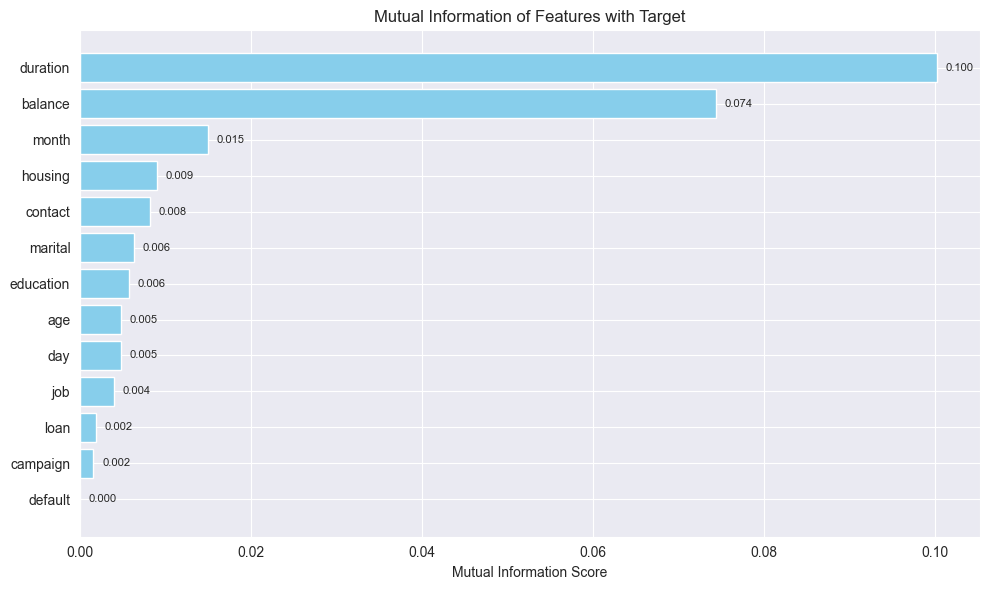

,Feature,MI Score
3,duration,0.100265
1,balance,0.074362
11,month,0.015011
7,housing,0.008958
5,contact,0.008187
9,marital,0.006344
6,education,0.005708
0,age,0.004800
2,day,0.004773
10,job,0.003964


In [20]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""
compute_mutual_information() : function to compute the mutual information that each feature shares with the target
@params : df - the input pandas dataframe, feature_cols[] - array holding all the features' column names, target_col - the target feature set to 'y'
@return : mi_df - the output pandas dataframe containing the mutual info score of each feature to the target 
"""
def compute_mutual_information(df, feature_cols, figsize, target_col='y', plot=True):

    # Copy and clean
    df = df.copy()
    df = df.replace([np.inf, -np.inf], np.nan).dropna()

    # Encode target
    df['y_binary'] = df[target_col].map({'no': 0, 'yes': 1})

    # Prepare feature matrix
    X = df[feature_cols].copy()

    # Encode categoricals
    for col in X.select_dtypes(include=['object', 'category']).columns:
        X[col] = X[col].astype('category').cat.codes

    # Identify discrete features
    discrete_mask = X.dtypes == 'int64'

    # Compute MI
    mi_scores = mutual_info_classif(X, df['y_binary'], discrete_features=discrete_mask, random_state=0)

    # Results DataFrame
    mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)

    # Plot (optional)
    if plot:
        plt.figure(figsize=figsize)
        bars = plt.barh(mi_df['Feature'], mi_df['MI Score'], color='skyblue')
        plt.xlabel("Mutual Information Score")
        plt.title("Mutual Information of Features with Target")
        for bar in bars:
            plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                     f"{bar.get_width():.3f}", va='center', fontsize=8)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    return mi_df

feature_cols = ['age', 'balance', 'day', 'duration', 'campaign',
                'contact', 'education', 'housing', 'loan',
                'marital', 'job', 'month', 'default']

mi_res = compute_mutual_information(data, feature_cols, (10,6))
mi_res

#### OBSERVATIONS 

| Feature | Rank | Type |Inference based on the MI |
| --- | --- | --- | --- |
| duration | 1 | continuous | Very strongly predictive towards the target |
| balance | 2 | continuous | Strong signal towards the predictive power - may need to transform/cap |
| month | 3 | discrete | Strong seasonal indicator of the target and also statistically signficant |
| housing | 4 | discrete | Decent indicator of financial status of the subscribers |
| contact | 5 | discrete | Fairly predictive on what means a subscriber uses to contact the client |
| day, age, marital | 6 | discrete, continuous, discrete | Low indictator of predictive strength, but potentially useful when interacting with other features |
| job | 7 | discrete | Surprisingly low, may benefit from grouping or better generalization |
| education, campaign, loan | 8 | continuous | Surprisingly low, may benefit from grouping or better generalization |
| default | 9 | discrete | Very surprisingly low, credit default should have been a strong indicator, but its not - must be dropped |


Concluding from the EDA process, and moving towards the feature engineering :
- The 'default' feature must be dropped from the feature set.
- These five features - 'duration', 'balance', 'month', 'housing', and 'contact' must be included in the feature set.
- The other features will be further examined in the feature engineering and will be treated accordingly. 

## FEATURE ENGINEERING

Based on the EDA observations, we will transform, cap or discretize certain continuous features and generalize some discrete features by creating groups. 

In [21]:
# for the feature engineering we will use this copy of the original dataset
df = data.copy()
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


### APPLY TRANSFORMATIONS

In [23]:
"""
group_job_by_subscription() : a function to generalize jobs into fewer categories based on their likelihood for y=1
@params : job - string holding the data value for job column 
@return : high, medium and low subscription likelihood based on the line plot from the multivariate analysis in EDA  
"""

def group_job_by_subscription(job):
    if job in ['student', 'retired', 'unemployed']:
        return 'high_subscribe'
    elif job in ['management', 'admin', 'technician', 'self-employed']:
        return 'medium_subscribe'
    else:
        return 'low_subscribe'
df['job_grouped'] = df['job'].apply(group_job_by_subscription)

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,job_grouped
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,medium_subscribe
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,medium_subscribe
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,low_subscribe
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,low_subscribe
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,low_subscribe
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no,medium_subscribe
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no,medium_subscribe
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no,low_subscribe
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no,high_subscribe
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no,medium_subscribe


In [24]:
'''
Apply the transformations to the continuous column(s) accordingly
'''
# 1. AGE — Discretize into bins
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 30, 40, 50, 60, 100],
    labels=['<30', '30-40', '40-50', '50-60', '60+']
)

balance_cap = df['balance'].quantile(0.99)
df['balance_capped'] = df['balance'].clip(lower=-1, upper=balance_cap)
# Apply log1p safely (no -inf possible now)
df['balance_log'] = np.log1p(df['balance_capped'])


# 3. DAY — Optional: keep as-is or bin (early/mid/late month)
df['day_bin'] = pd.cut(
    df['day'],
    bins=[0, 10, 20, 31],
    labels=['early', 'mid', 'late']
)

# 4. DURATION — Discretize into time buckets
df['duration_bin'] = pd.cut(
    df['duration'],
    bins=[-1, 100, 300, 600, 1000, np.inf],
    labels=['<100s', '100-300s', '300-600s', '600-1000s', '>1000s']
)

# 5. CAMPAIGN — Cap and bin
campaign_cap = df['campaign'].quantile(0.95)  # 95th percentile
df['campaign_capped'] = np.where(df['campaign'] > campaign_cap, campaign_cap, df['campaign'])

df['campaign_bin'] = pd.cut(
    df['campaign_capped'],
    bins=[0, 1, 3, 5, np.inf],
    labels=['1 contact', '2-3', '4-5', '6+']
)

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,y,job_grouped,age_group,balance_capped,balance_log,day_bin,duration_bin,campaign_capped,campaign_bin
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,no,medium_subscribe,50-60,2143.0,7.670429,early,100-300s,1.0,1 contact
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,no,medium_subscribe,40-50,29.0,3.401197,early,100-300s,1.0,1 contact
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,no,low_subscribe,30-40,2.0,1.098612,early,<100s,1.0,1 contact
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,no,low_subscribe,40-50,1506.0,7.317876,early,<100s,1.0,1 contact
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,no,low_subscribe,30-40,1.0,0.693147,early,100-300s,1.0,1 contact
5,35,management,married,tertiary,no,231,yes,no,unknown,5,...,1,no,medium_subscribe,30-40,231.0,5.446737,early,100-300s,1.0,1 contact
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,...,1,no,medium_subscribe,<30,447.0,6.104793,early,100-300s,1.0,1 contact
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,...,1,no,low_subscribe,40-50,2.0,1.098612,early,300-600s,1.0,1 contact
8,58,retired,married,primary,no,121,yes,no,unknown,5,...,1,no,high_subscribe,50-60,121.0,4.804021,early,<100s,1.0,1 contact
9,43,technician,single,secondary,no,593,yes,no,unknown,5,...,1,no,medium_subscribe,40-50,593.0,6.386879,early,<100s,1.0,1 contact


### REVALIDATE THE TRANSFORMED FEATURES

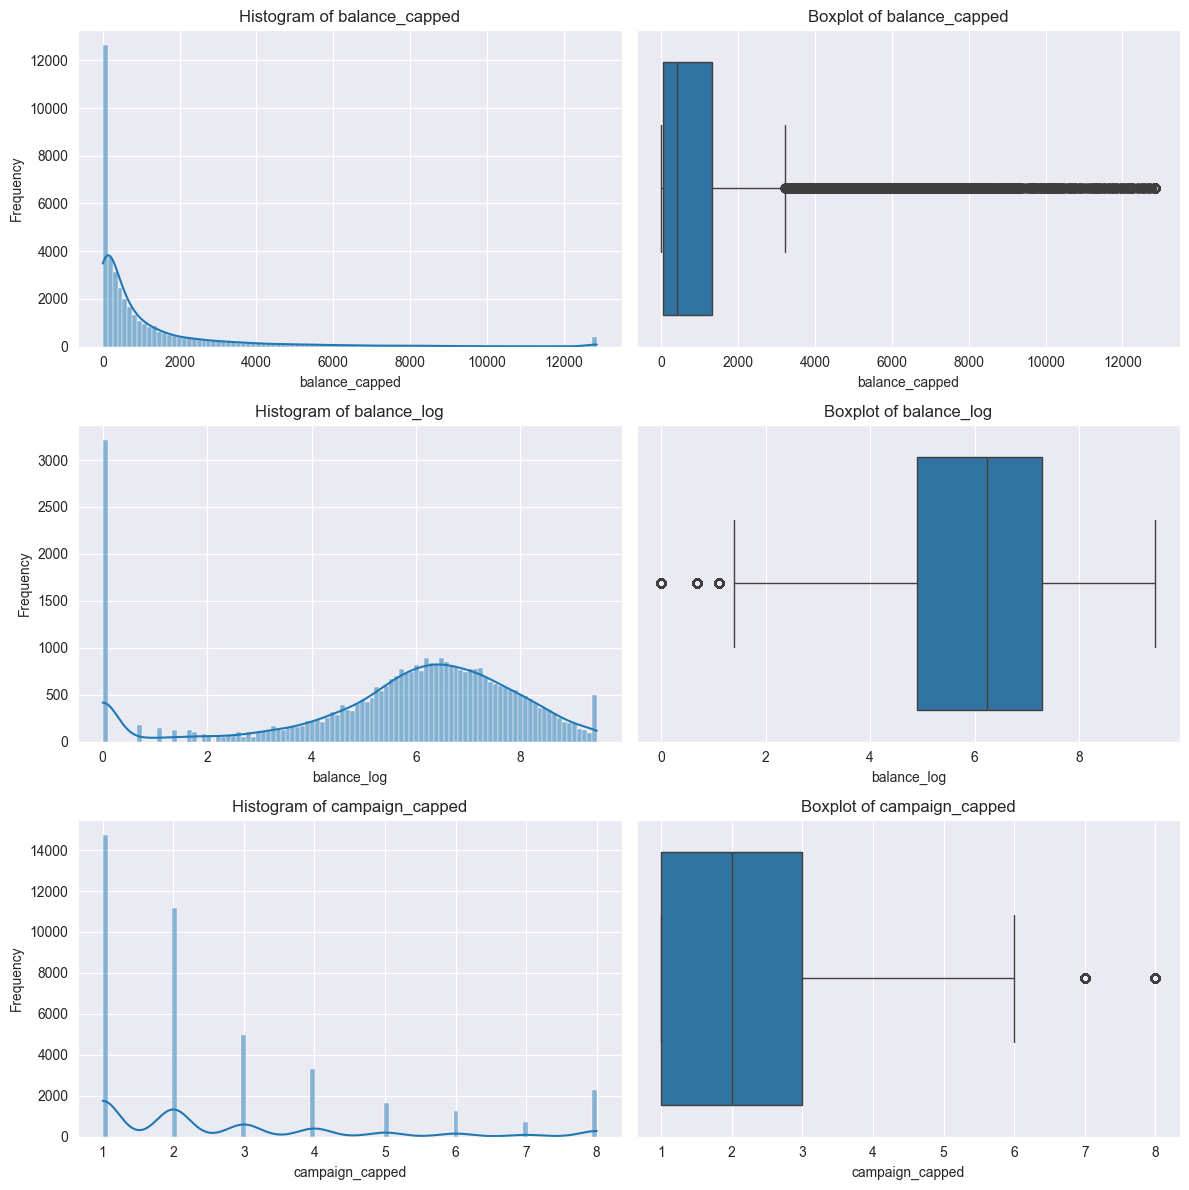

In [25]:
# check how the distribution of the newly transformed continuous columns have changed - if they have 
plot_hist_box(df, ['balance_capped','balance_log','campaign_capped'])

#### OBSERVATIONS

- It can be observed, applying log transformation to the balance and capping the campaign greatly reduces the number of outliers.
- However, the capping the balance barely shows any change - its still right skewed and has a lot of outliers - so not an effective transformation.
- Further investigation on the mutual information of these newly transformed features may give a better idea 

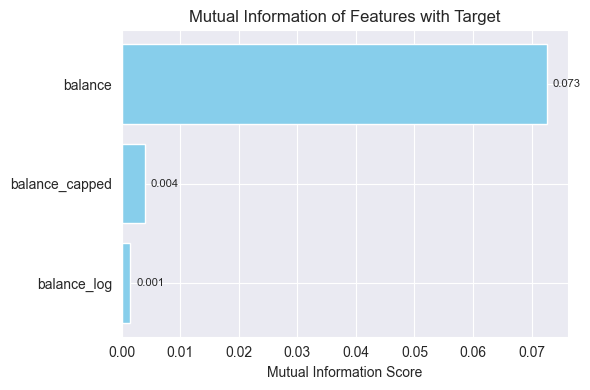

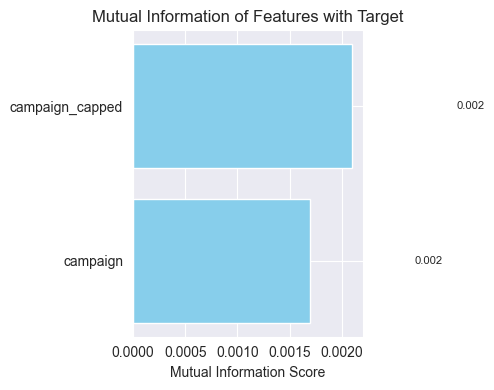

In [26]:
'''
check the MI of the transformed continuous features and compare with the original feature 
'''
feature_cols_C = [['balance', 'balance_capped', 'balance_log'], 
                  ['campaign','campaign_capped']]

for i in feature_cols_C:
    mi_results_updated_C = compute_mutual_information(df, i, (6,4))
    mi_results_updated_C

#### OBSERVATIONS

- The capped campaign shares more MI with the target, albeit only slightly - but still an improvement
- Conversely, the log-transformed and capped balance have way lesser MI than the original feature

Conclusion - use the capped campaign in the feature set for the ML model. Use capped or log balance for linear models, and the original balance for tree-based models. 

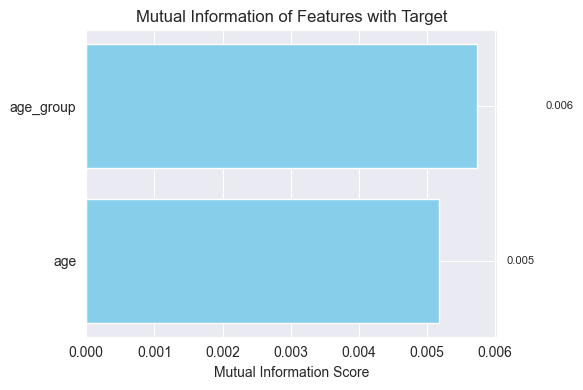

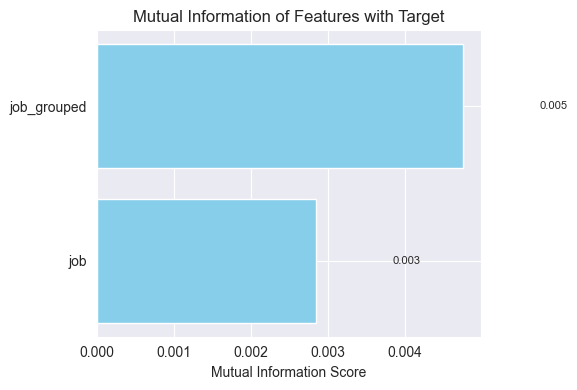

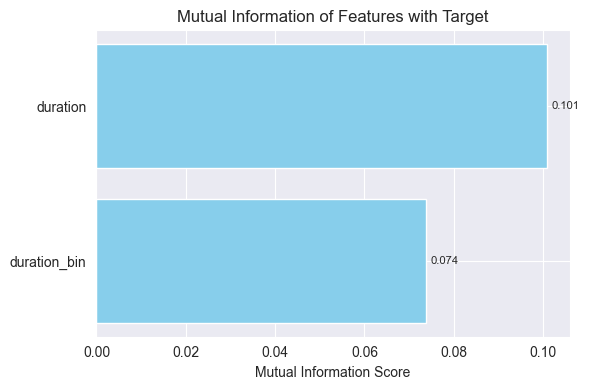

In [27]:
'''
Similarly, check the MI of the transformed discrete features and compare with the original feature 
'''
feature_cols_D = [['age', 'age_group'], 
                  ['job', 'job_grouped'], ['duration', 'duration_bin']]

for i in feature_cols_D:
    mi_results_updated_D = compute_mutual_information(df, i, (6,4))
    mi_results_updated_D

#### OBSERVATIONS

- Both grouped job and age display only marginal improvement in terms of the MI to target.
- The actual continous duration has a much stronger MI than the discretized duration. So, discretization actually reduces its predictive strength.
- Conclusion - Use the original duration, for the other two, can optionally use these newly generalized features - either way should be fine.

### BUILD THE FEATURE SET

For the ML-model building, we are going to tree-based models since the end goal is binary classification. Hence, the feature set will be build keep that in mind. 

**FINALIZED FEATURE SELECTION STRATEGY**


| Feature | Include | Type |Updated Inferences |
| --- | --- | --- | --- |
| duration | Must Include | continuous | Confirmed as the strongest predictor |
| balance | Must Include | continuous | Use the original balance feature for tree models - use its capped version for linear models |
| month | Must Include | discrete | Most predictive discrete feature - use as it as and do not generalize into quarters - maintain seasonality |
| housing | Must Include | discrete | Consistent and informative feature, and safe to be included |
| contact | Must Include | discrete | Both MI and Chi² confirm value, and fairly important since calls are an important subscription aspect |
| marital | Recommended to Include | discrete | Moderate predictive power but insightful when to comes to customer segments |
| age | Recommended to Include  | discrete |Gives a good idea about idea about what age groups subscribe; use the discretized version |
| job | Recommended to Include  | discrete | Based on the feature revalidation, use the grouped version instead, which is more indicative  |
| loan | Optional to Include  | discrete | Weak MI but statistically significant; useful in ensemble models, avoid in linear models  |
| campaign | Optional to Include  | continuous | Very low MI but may help in tree-based models, avoid in linear models as well, use the capped version 
| day | Do not Include  | continuous | 	Low MI and low interpretability due to its ambiguous nature of both discrete and continuous |
| default | Do not Include  | discrete | Neither statistically signficant or informatively useful, should have been, but its not for this data |


This feature selection strategy will be further useful when it comes to business recommendations on what aspects should the clients focus on. 


## MODEL EVALUATION & TESTING

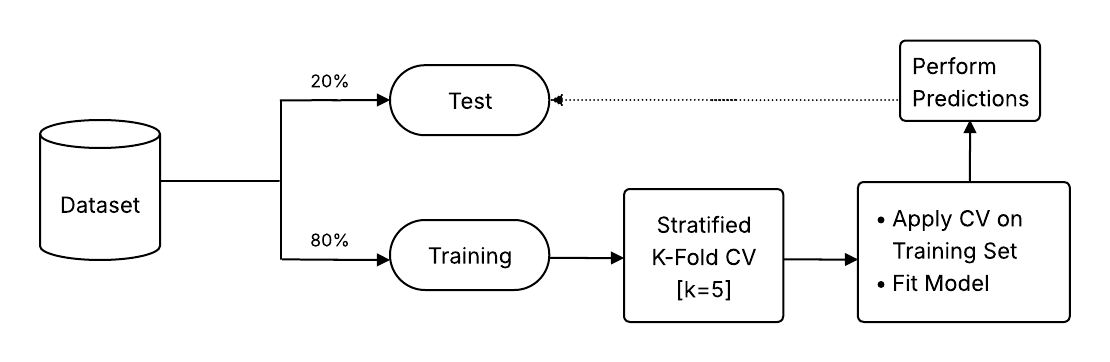

### LABEL ENCODING

In [28]:
'''
Apply Label Encoding to the discrete features to prepare them for the ML Modeling phase  
'''
from sklearn.preprocessing import LabelEncoder

# Select final features
selected_features = ['duration_bin', 'balance', 'month', 'housing', 'contact', 
                     'age_group', 'marital', 'loan', 
                     'job_grouped', 'education']

# Copy to working feature set
df_features = df[selected_features].copy()

# Encode target
df_features['y'] = df['y'].map({'no': 0, 'yes': 1})

# Label encode categorical columns
label_encoders = {}
discrete_cols = ['contact', 'month', 'duration_bin','education', 'housing', 'loan', 'marital', 'age_group', 'job_grouped']
for col in discrete_cols:
    le = LabelEncoder()
    df_features[col] = le.fit_transform(df_features[col])
    label_encoders[col] = le  # Store encoders for inverse transform if needed later

df_features.head(10)

,duration_bin,balance,month,housing,contact,age_group,marital,loan,job_grouped,education,y
0,0,2143,8,1,2,2,1,0,2,2,0
1,0,29,8,1,2,1,2,0,2,1,0
2,3,2,8,1,2,0,1,1,1,1,0
3,3,1506,8,1,2,1,1,0,1,3,0
4,0,1,8,0,2,0,2,0,1,3,0
5,0,231,8,1,2,0,1,0,2,2,0
6,0,447,8,1,2,4,2,1,2,2,0
7,1,2,8,1,2,1,0,0,1,2,0
8,3,121,8,1,2,2,1,0,0,0,0
9,3,593,8,1,2,1,2,0,2,1,0


### BUILD THE ML PIPELINE

In [29]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the data
X = df_features.drop(columns='y')
y = df_features['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


'''
tune_models_with_SMOTE_pipeline() : function to the tune the hyperparameters of some tree-based models and get the best performing model 
                                    based on the f-1 measure
@params : X_train - the feature set of the training data, y-train - the target column of the training data 
@return : the best performing tree-based model and its estimators based on the f-1 score
'''
def tune_models_with_SMOTE_pipeline(X_train, y_train):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    pipeline = ImbPipeline([
        ('sampling', SMOTE(random_state=42)),  # Sampling step
        ('model', RandomForestClassifier())    # Placeholder model
    ])

    param_grid = {
        # Resampling strategies
        'sampling': [
            SMOTE(random_state=42),
            RandomUnderSampler(random_state=42)
        ],

        # Models with hyperparameters
        'model': [
            RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5),
            RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10),
            lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=-1),
            lgb.LGBMClassifier(random_state=42, n_estimators=200, learning_rate=0.05, max_depth=-1),
            xgb.XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='logloss'),
            xgb.XGBClassifier(random_state=42, n_estimators=200, learning_rate=0.05, max_depth=7, use_label_encoder=False, eval_metric='logloss')
        ]
    }

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X_train, y_train)

    print(f"\n Best pipeline: {grid_search.best_estimator_}")
    print(f" Best F1 score: {grid_search.best_score_:.4f}")
    print(f" Best parameters: {grid_search.best_params_}")

    return grid_search.best_estimator_

In [30]:
best_model = tune_models_with_SMOTE_pipeline(X_train, y_train)
best_model

Fitting 5 folds for each of 12 candidates, totalling 60 fits

 Best pipeline: Pipeline(steps=[('sampling', RandomUnderSampler(random_state=42)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=

Pipeline(steps=[('sampling', RandomUnderSampler(random_state=42)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

### PERFORMANCE EVALUATION

In [31]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

'''
compile_classification_report() : function to the generate the classification report of the best model 
@params : model - the best model itself
          model_name - set a custom label to the model
          X_train - the feature set in the training data 
          y_train - the target feature in the training data
          X_test - the feature set in the test data 
          y_test - the target feature in the test data
          cv - the k_fold cross validation object that stratifies the dataset in 5 folds 
@return : an output pandas datafram comprising the essential metrics of the best model 
'''

def compile_classification_report(model, model_name, X_train, y_train, X_test, y_test, cv):
    results = []

    # Fit the model
    model.fit(X_train, y_train)

    # Cross-validation F1
    f1_cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    avg_f1_cv = f1_cv_scores.mean()

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Reports
    print(f"\n {model_name} Classification Report (Training Set):")
    print(classification_report(y_train, y_train_pred, digits=3))

    print(f"\n {model_name} Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred, digits=3))

    print("-------------------------------------------------------------")

    results.append({
        'Model': model_name,
        'Train Accuracy': round(train_acc, 3),
        'Test Accuracy': round(test_acc, 3),
        'Cross-Val F1 (Train)': round(avg_f1_cv, 3)
    })

    return pd.DataFrame(results)

In [32]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results_df = compile_classification_report(best_model, "Best SMOTE-Boosted Model", X_train, y_train, X_test[selected_features], y_test, cv)
results_df


 Best SMOTE-Boosted Model Classification Report (Training Set):
              precision    recall  f1-score   support

           0      0.993     0.827     0.902     29683
           1      0.293     0.921     0.445      2317

    accuracy                          0.833     32000
   macro avg      0.643     0.874     0.673     32000
weighted avg      0.942     0.833     0.869     32000


 Best SMOTE-Boosted Model Classification Report (Test Set):
              precision    recall  f1-score   support

           0      0.990     0.826     0.901      7421
           1      0.286     0.896     0.434       579

    accuracy                          0.831      8000
   macro avg      0.638     0.861     0.667      8000
weighted avg      0.939     0.831     0.867      8000

-------------------------------------------------------------


,Model,Train Accuracy,Test Accuracy,Cross-Val F1 (Train)
0,Best SMOTE-Boosted Model,0.833,0.831,0.436


#### OBSERVATIONS

- The model has the almost same accuracy of ~83% on both training and test sets, almost an ideal scenario - which means it is neither underfitting nor overfitting.
- For target y=1, the model has a strong recall of ~92% on the training set and ~90% on the test set - which implies very strong generalization on unseen data.
- The ability to generalize can be further validated by the F-1 scores which are very close in both training and test sets.
- The model has a much higher recall (which is what we actually need) and lower precision, hence, there is some kind of trade-off that we need to delve further into.

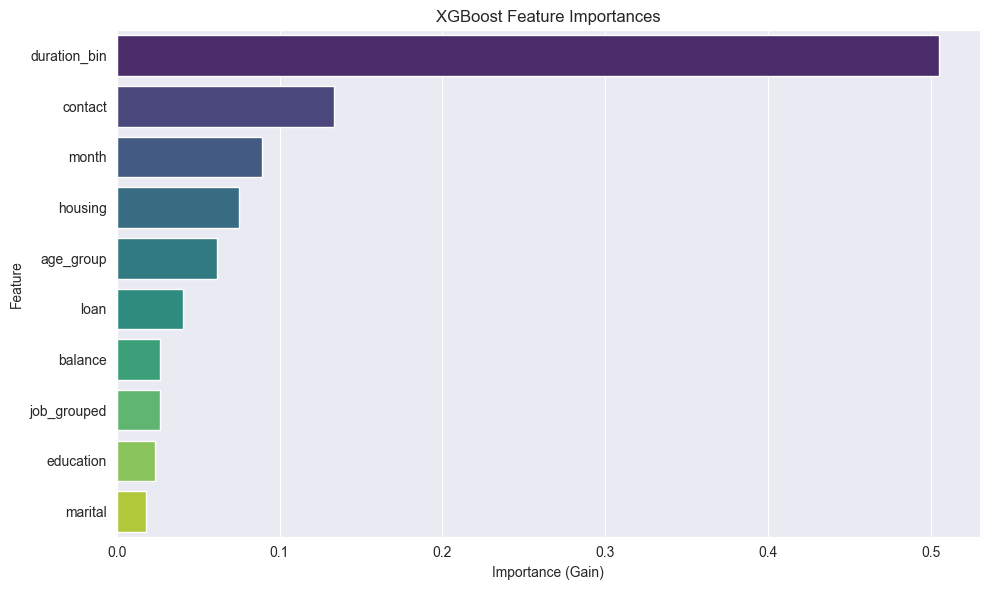

In [33]:
# Get feature importances (based on gain)
importances = best_model.named_steps['model'].feature_importances_
feature_names = X_train.columns  # Ensure this matches your training set

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance (Gain)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### OBSERVATIONS

- Based on the best model's feature importances, the duration is by far the strongest predictor of the subscription likelihood by a large margin.
- After the duration, the contact i.e. the mode of communication via the client reaches out to the customer is deterministic of the target.
- Month is also a moderately predictive, meaningly there is also some sort of seasonality that affects the likelihood of subscription.
- The other remaning features like Housing, age group, loan, balance, job group, education level and marital status are less deterministic. 

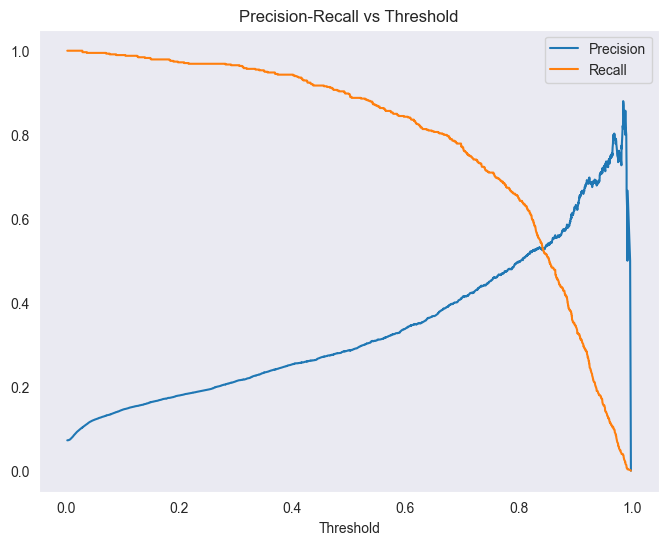

In [34]:
from sklearn.metrics import precision_recall_curve

y_proba = best_model.predict_proba(X_test)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the trade-off

plt.figure(figsize=(8, 6))
plt.plot(thresholds, prec[:-1], label='Precision')
plt.plot(thresholds, rec[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.grid()
plt.show()

### OBSERVATIONS 

- Recall stays near 1.0 until threshold ~0.5, indicating the model captures nearly all True positives at lower thresholds.
- Precision steadily improves with increasing threshold, crossing recall around threshold ~0.8, suggesting this is the near trade-off zone for balanced performance.
- Optimal threshold depends on priority of business goals — low threshold favors recall, while higher threshold favors precision. 

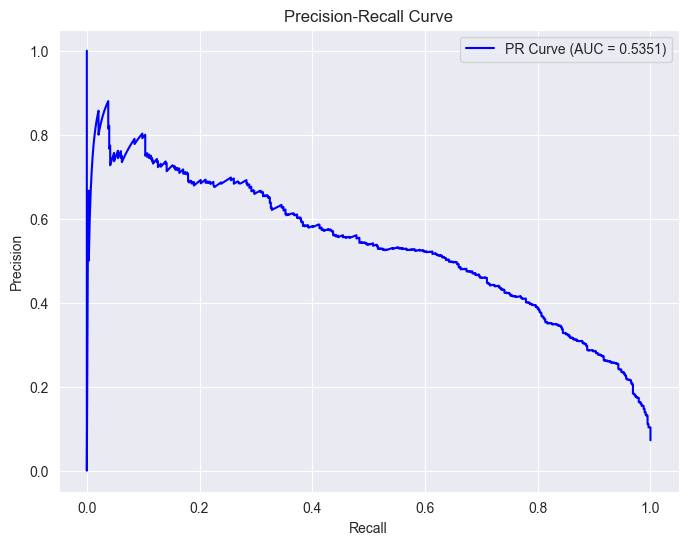

In [35]:
from sklearn.metrics import precision_recall_curve, auc

# Predict probabilities for the positive class
y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute PR AUC
pr_auc = auc(recall, precision)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

#### OBSERVATIONS

- AUC-PR score of ~0.54 is modest. It implies moderate ability to balance precision and recall - something expected in imbalanced classification problems like this one - where its a 93% to 7% imbalance.
- Precision goes down with increment in recall. As the model tries to capture more positives (higher recall), it also predicts more false positives, thereby reducing precision. So, there is a trade-off between Precision and Recall.
- For this problem, customers that are potential subscribers are the leads. So, we need to get them rightly predicted. Hence, higher recall or the True Positive Rate (TPR) must be prioritized.

### FINAL MODEL DEPLOYMENT & VALIDATION

 Classification Report (Full Dataset with Default Threshold 0.5):
              precision    recall  f1-score   support

           0      0.992     0.826     0.902     37104
           1      0.292     0.916     0.443      2896

    accuracy                          0.833     40000
   macro avg      0.642     0.871     0.672     40000
weighted avg      0.941     0.833     0.869     40000



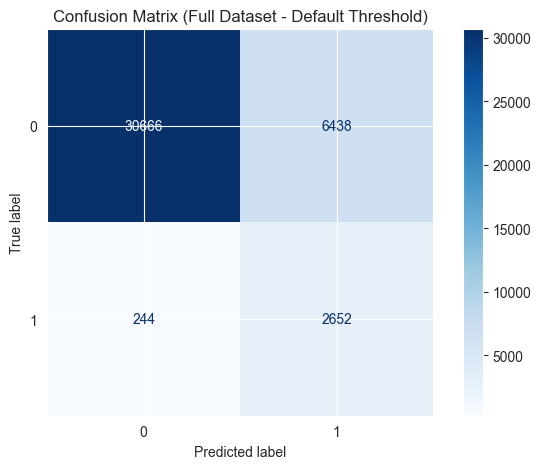

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Create a copy of the data to preserve original
df_eval = df_features.copy()

# Step 2: Prepare X and y
X_all = df_eval[selected_features]
y_true = df_eval['y']

# Step 3: Predict using the model's default threshold (0.5)
y_pred = best_model.predict(X_all)
y_pred_proba = best_model.predict_proba(X_all)[:, 1]

# Step 4: Add predictions to the DataFrame
df_eval['y_actual'] = y_true
df_eval['y_predicted'] = y_pred
df_eval['prediction_proba'] = y_pred_proba

# Step 5: Classification report
print(" Classification Report (Full Dataset with Default Threshold 0.5):")
print(classification_report(df_eval['y_actual'], df_eval['y_predicted'], digits=3))

# Step 6: Confusion matrix
cm = confusion_matrix(df_eval['y_actual'], df_eval['y_predicted'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Full Dataset - Default Threshold)")
plt.tight_layout()
plt.show()

#### OBSERVATIONS

- On the entire dataset, the best model scores the same accuracy of ~83% which also suprasses the benchmark of >= 81%.
- The recall is at 0.916, which means it got around ~92% of 1's correctly predicted - which is remarkable.
- Another observation is the significantly lower precision of ~29%, so the precision-recall trade-off is evident in the main dataset too. 

In [37]:
df_eval_copy = df_eval.copy()

arr = [
 'month',
 'housing',
 'contact',
 'age_group',
 'marital',
 'loan',
 'duration_bin',
 'job_grouped',
 'education']

for i in arr:
    col_name = str(i) + "_decoded"
    df_eval_copy[col_name] = label_encoders[i].inverse_transform(df_eval_copy[i])

df_eval_copy.head(10)

,duration_bin,balance,month,housing,contact,age_group,marital,loan,job_grouped,education,...,prediction_proba,month_decoded,housing_decoded,contact_decoded,age_group_decoded,marital_decoded,loan_decoded,duration_bin_decoded,job_grouped_decoded,education_decoded
0,0,2143,8,1,2,2,1,0,2,2,...,0.024350,may,yes,unknown,50-60,married,no,100-300s,medium_subscribe,tertiary
1,0,29,8,1,2,1,2,0,2,1,...,0.015705,may,yes,unknown,40-50,single,no,100-300s,medium_subscribe,secondary
2,3,2,8,1,2,0,1,1,1,1,...,0.004276,may,yes,unknown,30-40,married,yes,<100s,low_subscribe,secondary
3,3,1506,8,1,2,1,1,0,1,3,...,0.010539,may,yes,unknown,40-50,married,no,<100s,low_subscribe,unknown
4,0,1,8,0,2,0,2,0,1,3,...,0.018126,may,no,unknown,30-40,single,no,100-300s,low_subscribe,unknown
5,0,231,8,1,2,0,1,0,2,2,...,0.012782,may,yes,unknown,30-40,married,no,100-300s,medium_subscribe,tertiary
6,0,447,8,1,2,4,2,1,2,2,...,0.016149,may,yes,unknown,<30,single,yes,100-300s,medium_subscribe,tertiary
7,1,2,8,1,2,1,0,0,1,2,...,0.496665,may,yes,unknown,40-50,divorced,no,300-600s,low_subscribe,tertiary
8,3,121,8,1,2,2,1,0,0,0,...,0.005513,may,yes,unknown,50-60,married,no,<100s,high_subscribe,primary
9,3,593,8,1,2,1,2,0,2,1,...,0.010912,may,yes,unknown,40-50,single,no,<100s,medium_subscribe,secondary


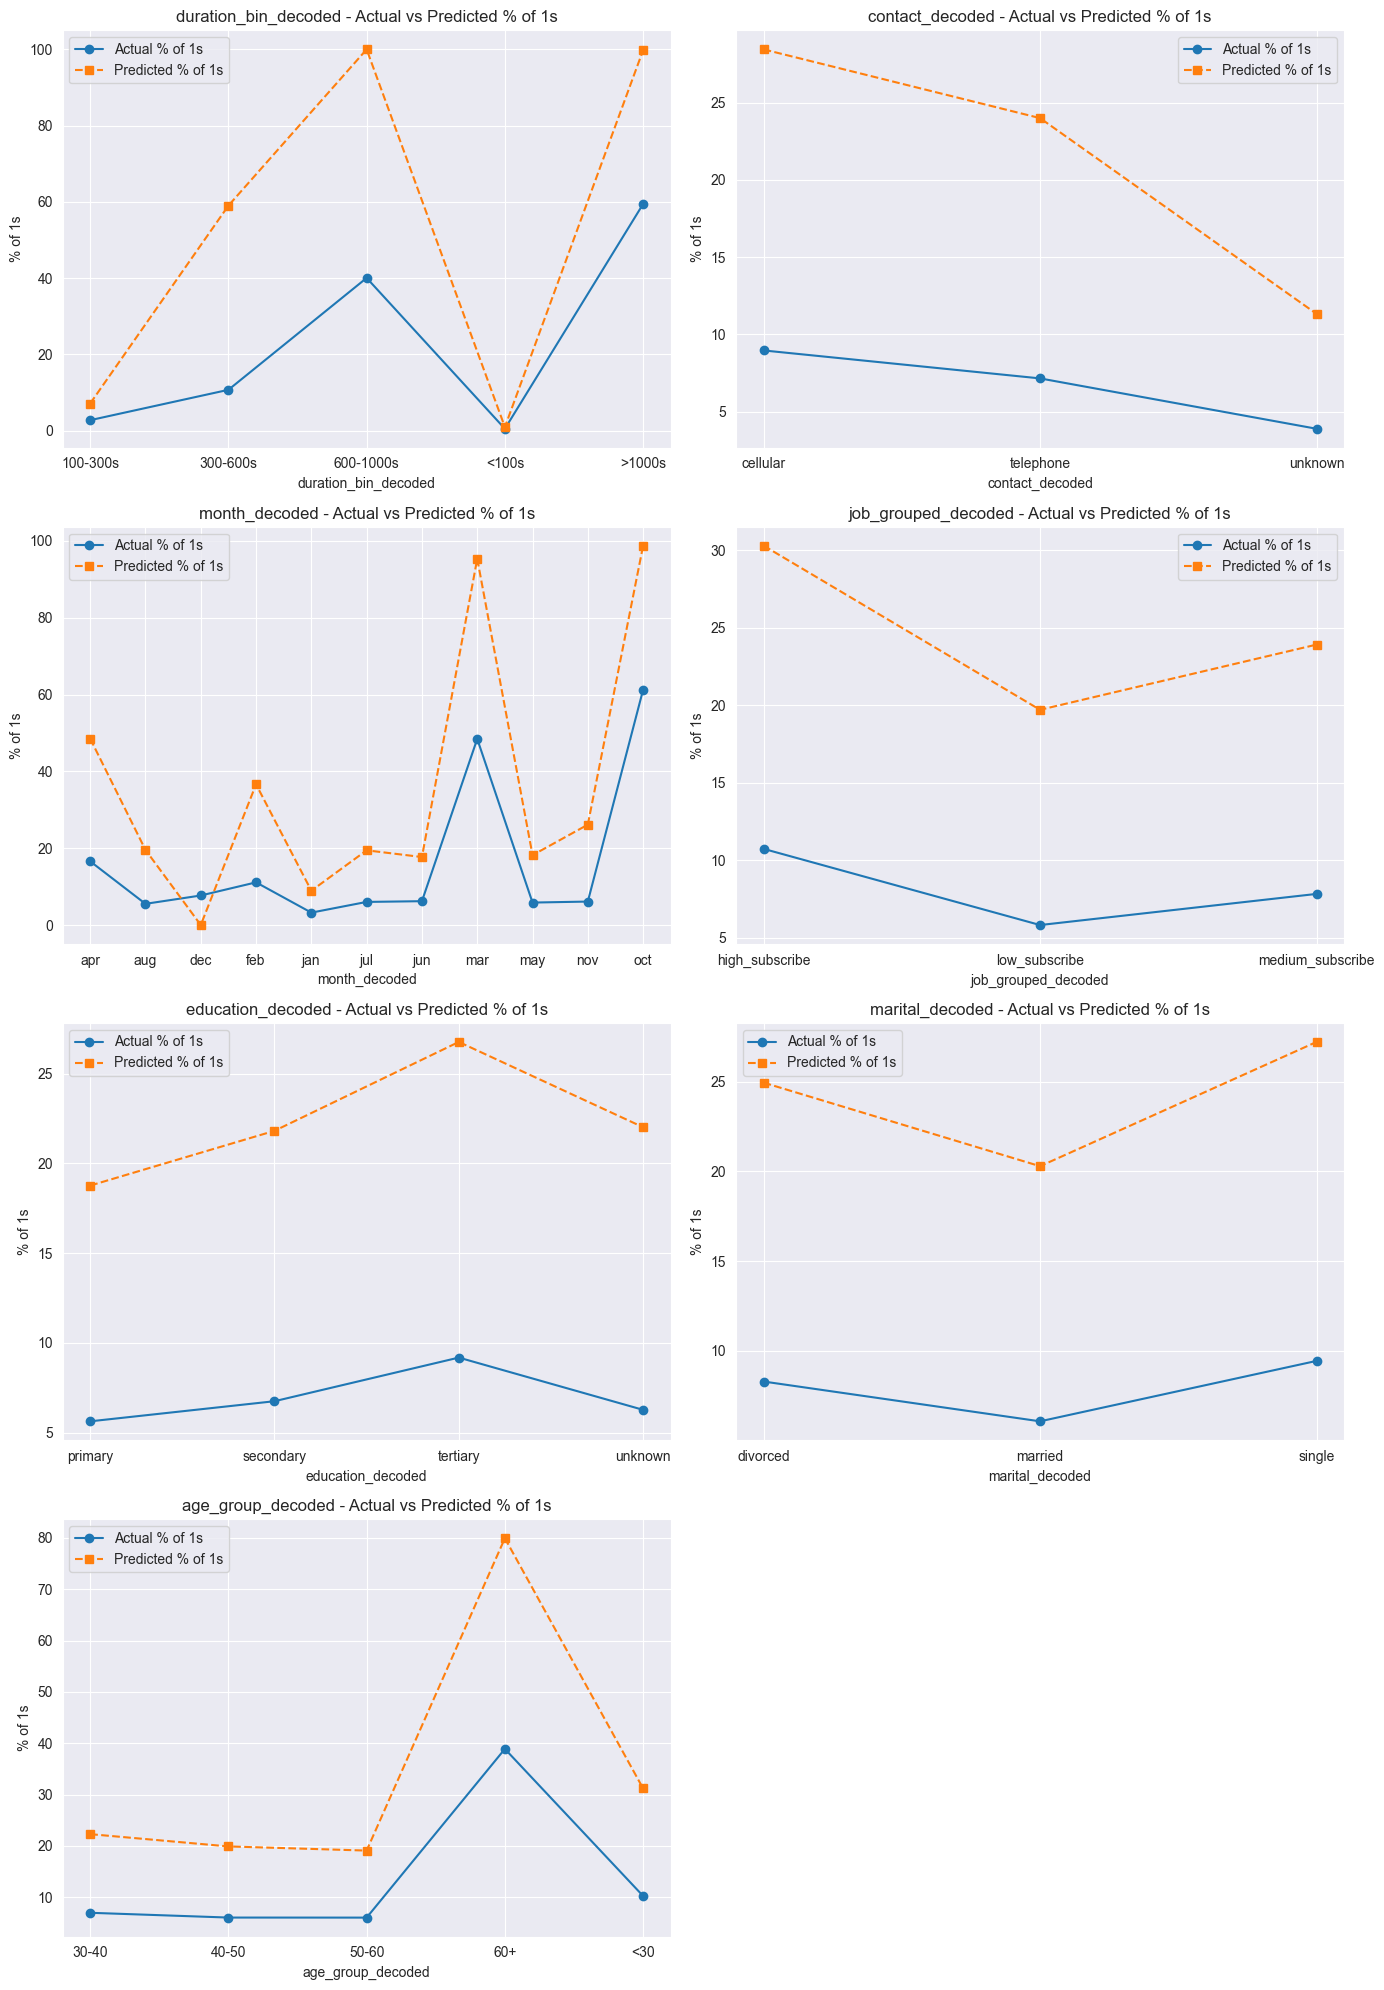

In [40]:
"""
aggregate_actual_vs_predicted() : a function to aggregate the count of y=1 for actual and predicted values by discrete feature
@params : df - the input pandas dataframe, feature - the discrete feature, actual_col - actual value, pred_col - predicted value
@return : pandas dataframe - feature, the % of actual 1s and the % of predicted 1's
"""

def aggregate_actual_vs_predicted(df, feature, actual_col='y_actual', pred_col='y_predicted'):
    # Compute actual % of 1s
    actual_counts = df.groupby(feature)[actual_col].value_counts().unstack(fill_value=0)
    actual_pct = (actual_counts[1] / actual_counts.sum(axis=1) * 100).round(2)

    # Compute predicted % of 1s
    pred_counts = df.groupby(feature)[pred_col].value_counts().unstack(fill_value=0)
    pred_pct = (pred_counts[1] / pred_counts.sum(axis=1) * 100).round(2)

    # Combine
    return pd.DataFrame({
        'Feature_Value': actual_pct.index,
        'Actual % of 1s': actual_pct.values,
        'Predicted % of 1s': pred_pct.reindex(actual_pct.index).fillna(0).values
    })


"""
plot_actual_vs_predicted_discrete() : a function to generate the line plots for actual v/s predicted by feature
@params : df - the input pandas dataframe, discrete_feature[] - array holding the discrete feature, 
        actual_col - actual value, pred_col - predicted value
@return : None
"""
def plot_actual_vs_predicted_discrete(df, discrete_features, actual_col='y_actual', pred_col='y_predicted'):
    import math
    n = len(discrete_features)
    rows = math.ceil(n / 2)
    fig, axes = plt.subplots(rows, 2, figsize=(14, 5 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(discrete_features):
        df_plot = aggregate_actual_vs_predicted(df, feature, actual_col, pred_col)
        
        axes[i].plot(df_plot['Feature_Value'], df_plot['Actual % of 1s'], marker='o', label='Actual % of 1s')
        axes[i].plot(df_plot['Feature_Value'], df_plot['Predicted % of 1s'], marker='s', linestyle='--', label='Predicted % of 1s')

        axes[i].set_title(f"{feature} - Actual vs Predicted % of 1s")
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('% of 1s')
        axes[i].legend()
        axes[i].grid(True)

    # Hide extra axes if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Columns in df_eval must include: y_actual, y_predicted
discrete_features = ['duration_bin_decoded', 'contact_decoded','month_decoded', 
                     'job_grouped_decoded', 'education_decoded', 
                     'marital_decoded', 'age_group_decoded'] 

plot_actual_vs_predicted_discrete(df_eval_copy, discrete_features)

## BUSINESS RECOMMENDATIONS

### WHAT MAKES THE CUSTOMERS SUBSCRIBE?

#### OBSERVATIONS
Based on post-hoc feature importance analysis, these features have the highest influence on the model’s decision-making:

1. **Contact**
    - The most importance feature - what mode of communication the customer uses is highly predictive of subscription.
    - Customers contacted via cellular are significantly more likely to subscribe, possibly due to accessibility or responsiveness during mobile communication.

2. **Duration (Call duration)**

    - The second most important determiner of subscription - how long do the customers talk to the client 
    - Calls between 600-1000 seconds or greater than 1000 seconds are strongly associated with customer conversion.
    - Implies detailed and meaningful calls builds a deeper engagement with customer and subsequently, greater chance to gaining a subscriber.

3. **Month**

    - Contacts during March and October leads to noticeably higher conversion.
    - These months may align with specific marketing campaigns, financial periods, or seasonal availability.

4. **Other relevant subscription drivers**

    - **Housing**: Customers without a housing loan show better conversion.
    - **Day** and **Age Group**: Reflect subtle behavioral or demographic patterns.
    - **Education**, **Marital**, **Job Group**, **Campaign** also add moderate predictive power.

#### SUMMARY 
Focus on longer but meaningful conversations, use cellular contact methods, and time the outreach during March or October to maximize success.

Follow this quick rule to build a marketing strategy: <br>
    -> if call_duration is [>600s] and contact == cellular and month in [mar, oct] -> prioritize outreach.

### WHICH CUSTOMER SEGMENTS SHOULD BE PRIORITIZED?

#### OBSERVATIONS

Based on the insights from Actual vs. Predicted % of Subscribers, the following customer segments emerge as prime targets:

**Job Profile**
- Customers in the "high_subscribe" group - mainly students, retired, or unemployed have higher natural conversion to become subscribers.
- These individuals may have more time, fewer commitments, or different motivations for saving or investing in the product.

**Marital Status**

- Single customers are significantly more likely to subscribe, maybe due to greater independent financial decision-making.

**Education**

- Those with tertiary education show consistently higher interest and conversion.
- It implies that financial literacy or awareness for the investment product could be contributing factors for them to subscribe.

**Month & Contact**

- Highest actual and predicted conversions observed in March and October.
- Cellular mode of contact highly dominates in conversion effectiveness.

**Call Duration**
- As mentioned, the longer call duration (> 1000 seconds) show very high actual and predicted success.
- However, these calls need to be meaningful, well-explanatory and focused towards addressing the customer concerns - else it could backfire and lead to a customer churn.
  
#### SUMMARY

Prioritize students, retired, single and highly educated customers, contact via cellular and in March or October, with longer but meaningful engagement to boost conversion rates.

